In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.datasets import mnist

Using TensorFlow backend.


# data_load

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
(train_num, h, w) = x_train.shape
(test_num, h, w) = x_test.shape
x_train = x_train.reshape(train_num, h * w)
x_test = x_test.reshape(test_num, h * w)

# Dimension Reduction

## 固有値観察

In [3]:
%%time
from sklearn.preprocessing import StandardScaler
x_train_std = StandardScaler().fit_transform(x_train)

mean_vec = np.mean(x_train_std, axis = 0)
# 分散行列計算
cov_mat = np.cov(x_train_std.T) # 画素のデータの次元を落としたいので転置
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [ (np.abs(eig_vals[i]), eig_vecs[:,i] ) for i in range( len(eig_vals) )]

eig_pairs.sort(key = lambda x: x[0], reverse= True)
tot = sum(eig_vals)
var_exp = [ (i/tot) * 100 for i in sorted(eig_vals, reverse = True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

CPU times: user 5.57 s, sys: 1.88 s, total: 7.46 s
Wall time: 3.1 s


Text(0, 0.5, 'Individual Explained Variance')

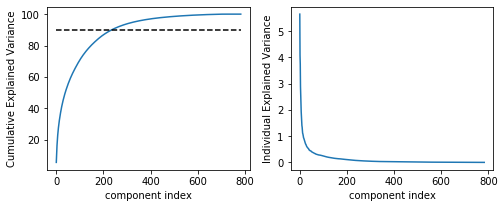

In [4]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
plt.plot(np.arange(784), cum_var_exp)
plt.plot(np.arange(784), np.ones(784) * 90, c = 'k', linestyle = "--")
plt.xlabel("component index")
plt.ylabel("Cumulative Explained Variance")

plt.subplot(1,2,2)
plt.plot(np.arange(784), var_exp)
plt.xlabel("component index")
plt.ylabel("Individual Explained Variance")

In [5]:
n_components = 300

## Dimension Reduction

In [13]:
%%time
from sklearn.decomposition import PCA
pca = PCA(n_components=n_components).fit(x_train)
print(pca.components_.shape) # feature * data
eigenvalues = pca.components_
x_train_recon = x_train @ eigenvalues.T #reconは90%データを表現出来ている事が分かる．
train_dim = x_train_recon.shape[0]

(300, 784)
CPU times: user 40.2 s, sys: 8.78 s, total: 48.9 s
Wall time: 14.8 s


In [18]:
%%time
pca = PCA(n_components=n_components).fit(x_test)
print(pca.components_.shape) # feature * data
eigenvalues = pca.components_
x_test_recon = x_test @ eigenvalues.T #reconは90%データを表現出来ている事が分かる．
test_dim = x_test_recon.shape[0]

(300, 784)
CPU times: user 7.78 s, sys: 3.87 s, total: 11.7 s
Wall time: 3.55 s


# SVM

In [19]:
from sklearn import svm, metrics

In [20]:
train_num_slice = slice(0,1000,1)

In [16]:
%%time
print("training")
clf = svm.SVC()
clf.fit(x_train_recon[train_num_slice], y_train[train_num_slice])

print("predicting")
predict = clf.predict(x_test_recon)

ac_score = metrics.accuracy_score(y_test, predict)
cl_report = metrics.classification_report(y_test, predict)

training
predicting
CPU times: user 3.73 s, sys: 15.4 ms, total: 3.74 s
Wall time: 3.74 s


In [17]:
print("正解率 = ", ac_score)
print(cl_report)

正解率 =  0.1216
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       980
           1       0.00      0.00      0.00      1135
           2       0.08      0.06      0.07      1032
           3       0.05      0.13      0.07      1010
           4       0.01      0.01      0.01       982
           5       0.08      0.11      0.09       892
           6       0.21      0.08      0.12       958
           7       0.04      0.04      0.04      1028
           8       0.00      0.00      0.00       974
           9       0.01      0.01      0.01      1009

    accuracy                           0.12     10000
   macro avg       0.12      0.12      0.12     10000
weighted avg       0.12      0.12      0.12     10000



TIPS

In [ ]:
# mnistのデータ
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

In [ ]:
%%time
from sklearn.preprocessing import StandardScaler
x_train_std = StandardScaler().fit_transform(x_train)

mean_vec = np.mean(x_train_std, axis = 0)
# 分散行列計算
cov_mat = np.cov(x_train_std.T) # 画素のデータの次元を落としたいので転置
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [ (np.abs(eig_vals[i]), eig_vecs[:,i] ) for i in range( len(eig_vals) )]

eig_pairs.sort(key = lambda x: x[0], reverse= True)
tot = sum(eig_vals)
var_exp = [ (i/tot) * 100 for i in sorted(eig_vals, reverse = True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance


In [39]:
# 以下の違い説明出来るか？
# fitは数値計算の実行，transformは正規化の実行．
# trainを正規化したmaxとminでtestを正規化する必要があるので，trainはfitしてもtestはfit_transformするべき
PCA.fit_transform(x_train)
PCA.fit()
PCA.transform()

TypeError: fit_transform() missing 1 required positional argument: 'X'